## **Presentacion**
La idea de este notebook es resolver el ejercicio 1 planteado en Taligent para  Data Science.

Se dispone de un dataset en formato ‘xlsx’ con información de propiedades en CABA.

## Objetivos
- Obetener un modelo que arroje el precio de una propiedad en función de ciertas características.
- Poder presentar y explicar el modelo a una persona no afín al mundo de los datos.

## Importación de librerías

In [ ]:
import pandas as pd ## para importar el dataset y poder analizar el mismo
import matplotlib.pyplot as plt ## para graficos de estadistica
import seaborn as sns ## para graficos de estadistica
import numpy as np ## para trabajar con matrices

## Lectura del dataset

In [ ]:
xls_id = "1iocNVlBC12oLhB5BQxXSki3wISO_s0Yg"
url = f"https://docs.google.com/spreadsheets/d/{xls_id}/export?format=xlsx"
df1 = pd.read_excel(url, sheet_name=0)   # primera hoja
df2 = pd.read_excel(url, sheet_name=1)   # segunda hoja
df3 = pd.read_excel(url, sheet_name=2)   # tercera hoja

In [ ]:
df1.head(2) # reviso que hay en cada hoja

,ID,property_type,lat,lon,description,title
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...


In [ ]:
df2.head(2) # reviso que hay en cada hoja

,ID,price_usd,surface_total,surface_covered,floor,rooms,expenses
0,222,250.0k,150,140,NaN,6,NaN
1,4224,399.0k,164,155,NaN,4,NaN


In [ ]:
df3.head(2) # reviso que hay en cada hoja

,ID,barrio,comuna
0,4630,NUÑEZ,13
1,10134,MATADEROS,9


In [ ]:
df1df2 = df1.merge(df2, how = 'left', on='ID') # hago merge de las dos primeras hojas a través del ID

In [ ]:
df1df2.head(3) # chequeo que quedó ok

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...,100.0k,52,44,NaN,2,NaN
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...,350.0k,111,104,NaN,4,5000.0
2,1826,apartment,-345.829.338.033,-584.219.018.513,Living comedor.Dormitorios 1 con placard. Coci...,Venta. Departamento 2 Ambientes. Guemes 4400. ...,93.5k,32,32,NaN,2,NaN


In [ ]:
df = df1df2.merge(df3, how = 'left', on='ID') # agrego al merge la 3° hoja

In [ ]:
df.head(2) # reviso que el df final quedó completo

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...,100.0k,52,44,NaN,2,NaN,BALVANERA,3
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...,350.0k,111,104,NaN,4,5000.0,PALERMO,14


In [ ]:
df.shape #check de cantidad de columnas y registros

(10567, 14)

In [ ]:
df.columns # check para saber si me quedo con el nombre de las columnas o las modifico


Index(['ID', 'property_type', 'lat', 'lon', 'description', 'title',
       'price_usd', 'surface_total', 'surface_covered', 'floor', 'rooms',
       'expenses', 'barrio', 'comuna'],
      dtype='object')

In [ ]:
df.info() # check de tipo de dato por columnas
## Ajustar la columna de precio, latitud y longitud

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10567 non-null  int64  
 1   property_type    10079 non-null  object 
 2   lat              10567 non-null  object 
 3   lon              10567 non-null  object 
 4   description      10567 non-null  object 
 5   title            10567 non-null  object 
 6   price_usd        10567 non-null  object 
 7   surface_total    10567 non-null  int64  
 8   surface_covered  10567 non-null  int64  
 9   floor            1717 non-null   float64
 10  rooms            10567 non-null  int64  
 11  expenses         2535 non-null   float64
 12  barrio           10567 non-null  object 
 13  comuna           10567 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


## Limpieza de Datos

In [ ]:
## Ajusto la columna de precio
df["price_usd"] = (
    df["price_usd"]
      .str.replace("k", "", regex=True)   # quita k/K finales
      )
df["price_usd"] = df["price_usd"].astype("float64")
df["price_usd"] = df["price_usd"]*100

In [ ]:
#Transformar Latitud a float64
# Primero, debes reemplazar los puntos incorrectos. Usaremos regex para transformar el formato.
df['lat'] = df['lat'].str.replace('.', '', regex=False)  # Eliminar todos los puntos
df['lat'] = df['lat'].apply(lambda x: x[:3] + '.' + x[3:]) #sumo el punto dp de los tres primeros valores
df['lat'] = df['lat'].astype('float64') # paso a float

In [ ]:
#Transformar lonitud a float64
# Primero, debes reemplazar los puntos incorrectos. Usaremos regex para transformar el formato.
df['lon'] = df['lon'].str.replace('.', '', regex=False)  # Eliminar todos los puntos
df['lon'] = df['lon'].apply(lambda x: x[:3] + '.' + x[3:]) #sumo el punto dp de los tres primeros valores
df['lon'] = df['lon'].astype('float64') # paso a float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10567 non-null  int64  
 1   property_type    10079 non-null  object 
 2   lat              10567 non-null  float64
 3   lon              10567 non-null  float64
 4   description      10567 non-null  object 
 5   title            10567 non-null  object 
 6   price_usd        10567 non-null  float64
 7   surface_total    10567 non-null  int64  
 8   surface_covered  10567 non-null  int64  
 9   floor            1717 non-null   float64
 10  rooms            10567 non-null  int64  
 11  expenses         2535 non-null   float64
 12  barrio           10567 non-null  object 
 13  comuna           10567 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [ ]:
# Saber si hay nulos
df.isnull().sum()

,0
ID,0
property_type,488
lat,0
lon,0
description,0
title,0
price_usd,0
surface_total,0
surface_covered,0
floor,8850


## Resolución de Preguntas del Ejercicio

1. ¿Cuál es el ID del inmueble que requiere mayor gasto/inversión (‘price_usd’ +
‘expenses’) para adquirirlo?


In [ ]:
#Completar nulos
df.fillna({'expenses': 0}, inplace=True)


In [ ]:
#sumo una columna al df para poder encontrar el MAX de la suma de ambas variables
df["price+expenses"] = df['price_usd'] + df['expenses']

In [ ]:
#Filtro el Max para esa columna
df[ df ['price+expenses'] == df ['price+expenses'].max() ]

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna,price+expenses
7111,6528,apartment,-34.640267,-58.457566,"Venta de Departamento 3 AMBIENTES en Flores, C...",DEPARTAMENTO EN VENTA.|.APARTMENT,1111111.1,78,68,7.0,3,0.0,FLORES,7,1111111.1


2.  Cual es el ID de la casa (‘house’) que tiene una superficie descubierta de al menos
800 m2 y su valor (‘price_usd’) es el más barato?


In [ ]:
#Sumo una columna al df para poder tener el dato de superficie descubierta
df["surface_uncovered"] = df['surface_total'] - df['surface_covered']

In [ ]:
#Filtro por las primeras dos condiciones
df_filtrado = df[(df["surface_uncovered"] >= 800) & (df["property_type"] == "house")]

In [ ]:
#Del df_filtrado obtengo el que tiene el menor precio
df_filtrado[ df_filtrado ['price_usd'] == df_filtrado ['price_usd'].min() ]

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna,price+expenses,surface_uncovered
8323,2903,house,-34.586789,-58.412985,COSTA ESMERALDA BARRIO EQUESTRE EXCELENTE CHAL...,COSTA ESMERALDA.|.HOUSE,15000.0,1000,190,NaN,4,0.0,PALERMO,14,15000.0,810


3. Obtener el TOP de las 3 propiedades más caras, para cada tipo de propiedad.


In [ ]:
# Observo los valores que puede asumir la variable "tipo de propiedad"
df["property_type"].unique()

array(['apartment', 'house', nan], dtype=object)

In [ ]:
#Reemplazo los nulos por "sin dato"
df.fillna({'property_type': 'Sin Dato'}, inplace=True)

# Check del cambio"
df["property_type"].unique()

array(['apartment', 'house', 'Sin Dato'], dtype=object)

In [ ]:
 #Consulto el top3 para cada tipo de propiedad
df_top= df.groupby("property_type")["price_usd"]. nlargest(3)
df_top =df_top.reset_index(level=0, drop=True) # me quedo con los indices
df_top

df_top.index

df.loc[df_top.index] # muestro los registros que se corresponden con el indice obtenido en el paso anterior



,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna,price+expenses,surface_uncovered
2097,7033,Sin Dato,-34.596275,-58.378964,Edificio Unzué. Es uno de los 35 de la ciudad ...,Marcelo T de Alvear 800 - Excelente piso en Pl...,320000.0,700,700,NaN,8,0.0,RETIRO,1,320000.0,0
7974,380,Sin Dato,-34.555462,-58.441991,Smart-house se impone como nueva tendencia en ...,"Smart House, Cazadores Al 1900 Belgrano Chico....",310000.0,530,424,NaN,4,0.0,BELGRANO,13,310000.0,106
8013,2889,Sin Dato,-34.566409,-58.432300,Edificio ubicado frente al Hipódromo de Palerm...,Único piso con inmejorable vista..|.APARTMENT,240000.0,498,434,NaN,7,0.0,PALERMO,14,240000.0,64
7111,6528,apartment,-34.640267,-58.457566,"Venta de Departamento 3 AMBIENTES en Flores, C...",DEPARTAMENTO EN VENTA.|.APARTMENT,1111111.1,78,68,7.0,3,0.0,FLORES,7,1111111.1,10
5744,753,apartment,-34.552542,-58.439523,"Triplex en Forum Alcorta, 4 SUITES en 600 metr...",Triplex en Forum Alcorta - Belgrano Chico.|.AP...,550000.0,533,478,NaN,6,40000.0,BELGRANO,13,590000.0,55
4952,2977,apartment,-34.577254,-58.424960,espectacular depto con ista al frenteESTAS PRO...,Departamento - Palermo.|.APARTMENT,452000.0,9874,54,NaN,7,0.0,PALERMO,14,452000.0,9820
7293,2836,house,-34.569765,-58.439283,Corredor Responsable: Gustavo Guastello - C.U....,Casa Palermo 6 ambientes o mas..|.HOUSE,350000.0,900,900,NaN,6,0.0,PALERMO,14,350000.0,0
7210,2329,house,-34.577640,-58.401492,Corredor Responsable: IGNACIO FEIJOO - CUCICBA...,VENTA CASA SEÑORIAL Bo. Parque con jardin y pi...,320000.0,600,530,NaN,9,0.0,PALERMO,14,320000.0,70
2314,2797,house,-34.568488,-58.440266,"ESPECTACULAR CASA, en inmejorable zona Residen...",IMPORTANTE CASA EN GOROSTIAGA Y MALASIA.|.HOUSE,300000.0,900,700,NaN,7,0.0,PALERMO,14,300000.0,200


In [ ]:
## Armo otra opción de respuesta para que me traiga los valores empatados

# Asigo un ranking por grupo: method="dense", los empates comparten rango y no deja huecos
df["rank_price"] = (
    df.groupby("property_type")["price_usd"]
      .rank(method="dense", ascending=False)
)
df_top = df[df["rank_price"] <= 3]

df_top.sort_values(by =['property_type', "rank_price"])



,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna,price+expenses,surface_uncovered,rank_price
2097,7033,Sin Dato,-34.596275,-58.378964,Edificio Unzué. Es uno de los 35 de la ciudad ...,Marcelo T de Alvear 800 - Excelente piso en Pl...,320000.0,700,700,NaN,8,0.0,RETIRO,1,320000.0,0,1.0
7974,380,Sin Dato,-34.555462,-58.441991,Smart-house se impone como nueva tendencia en ...,"Smart House, Cazadores Al 1900 Belgrano Chico....",310000.0,530,424,NaN,4,0.0,BELGRANO,13,310000.0,106,2.0
8013,2889,Sin Dato,-34.566409,-58.432300,Edificio ubicado frente al Hipódromo de Palerm...,Único piso con inmejorable vista..|.APARTMENT,240000.0,498,434,NaN,7,0.0,PALERMO,14,240000.0,64,3.0
7111,6528,apartment,-34.640267,-58.457566,"Venta de Departamento 3 AMBIENTES en Flores, C...",DEPARTAMENTO EN VENTA.|.APARTMENT,1111111.1,78,68,7.0,3,0.0,FLORES,7,1111111.1,10,1.0
5744,753,apartment,-34.552542,-58.439523,"Triplex en Forum Alcorta, 4 SUITES en 600 metr...",Triplex en Forum Alcorta - Belgrano Chico.|.AP...,550000.0,533,478,NaN,6,40000.0,BELGRANO,13,590000.0,55,2.0
4952,2977,apartment,-34.577254,-58.424960,espectacular depto con ista al frenteESTAS PRO...,Departamento - Palermo.|.APARTMENT,452000.0,9874,54,NaN,7,0.0,PALERMO,14,452000.0,9820,3.0
7293,2836,house,-34.569765,-58.439283,Corredor Responsable: Gustavo Guastello - C.U....,Casa Palermo 6 ambientes o mas..|.HOUSE,350000.0,900,900,NaN,6,0.0,PALERMO,14,350000.0,0,1.0
7210,2329,house,-34.577640,-58.401492,Corredor Responsable: IGNACIO FEIJOO - CUCICBA...,VENTA CASA SEÑORIAL Bo. Parque con jardin y pi...,320000.0,600,530,NaN,9,0.0,PALERMO,14,320000.0,70,2.0
2314,2797,house,-34.568488,-58.440266,"ESPECTACULAR CASA, en inmejorable zona Residen...",IMPORTANTE CASA EN GOROSTIAGA Y MALASIA.|.HOUSE,300000.0,900,700,NaN,7,0.0,PALERMO,14,300000.0,200,3.0
5740,1790,house,-34.578297,-58.401198,Imponente casa de 3 plantas con ascensor en Pa...,Casa - Palermo Chico.|.HOUSE,300000.0,590,380,NaN,6,0.0,PALERMO,14,300000.0,210,3.0


4. Obtener el valor promedio de las propiedades para cada barrio.

In [ ]:
(df.groupby("barrio")["price_usd"].mean()).sort_values(ascending=False)


,price_usd
barrio,
PUERTO MADERO,100144.564211
RETIRO,51113.449633
PALERMO,44795.479268
BELGRANO,43440.308163
RECOLETA,39086.189432
NUÑEZ,35010.009091
VILLA DEVOTO,31537.623881
VILLA ORTUZAR,30548.678049
COLEGIALES,26443.502404


5. ¿Cuál es la comuna con más propiedades a la venta?


In [ ]:
## Para ver categorías y cantidades
df.comuna.value_counts().sort_values(ascending=False)

## la comuna 14

,count
comuna,
14,1693
1,1306
13,1289
2,1145
15,705
12,683
3,682
6,551
7,526


6. ¿Cuál es el barrio con mayor costo promedio por metro cuadrado cubierto?


In [ ]:
## Agrego columna para calcular el precio (o costo) por m2 cubierto
df['price_M2_covered'] = df['price_usd'] / df['surface_covered']

In [ ]:
#Calculo el promedio por barrio
#df.groupby("barrio")["price_M2_covered"].mean().sort_values(ascending=False)
df.groupby("barrio")["price_M2_covered"].mean().nlargest(1)

## Rta: Puerto Madero

,price_M2_covered
barrio,
PUERTO MADERO,670.591541


## Analisis Exploratorio (previo modelo)

### Limpieza de Outliers Target

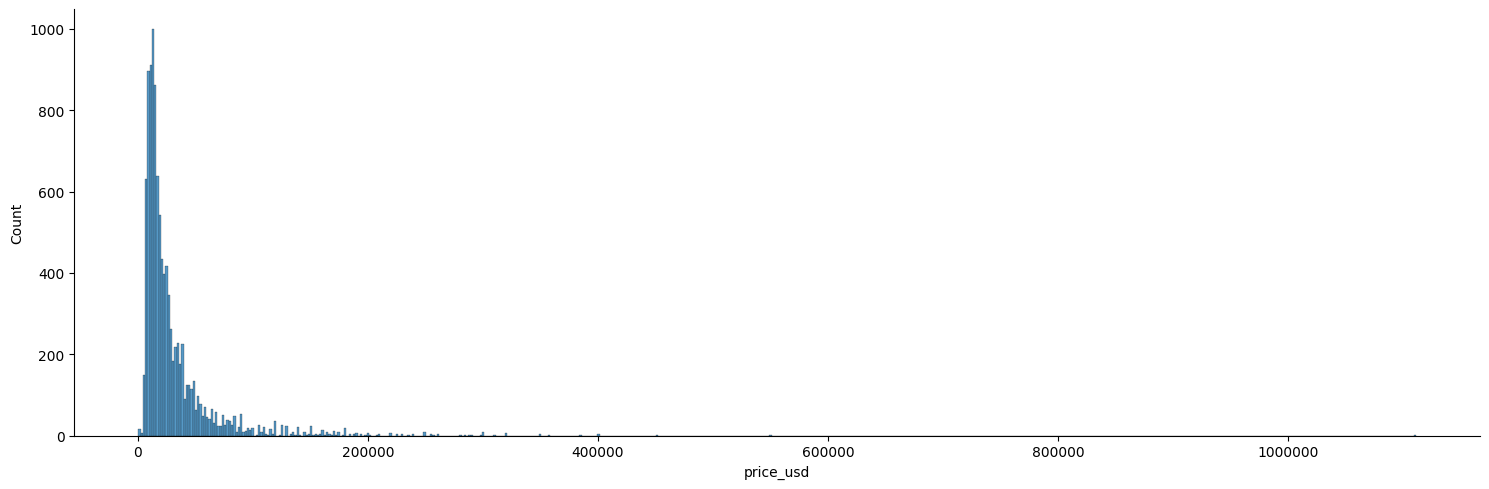

In [ ]:
## Reviso la distribución de la variable a predecir
sns.displot(df["price_usd"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)

df.price_usd.describe()

,price_usd
count,"10,567.00"
mean,"30,432.62"
std,"37,126.58"
min,504.30
25%,"12,400.00"
50%,"18,900.00"
75%,"34,000.00"
max,"1,111,111.10"


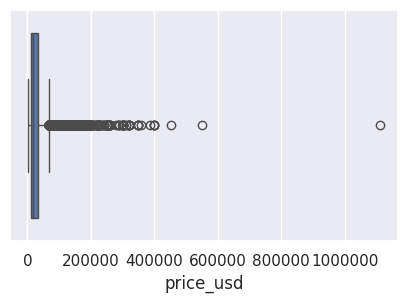

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["price_usd"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

##### Metodo Quartiles

In [ ]:
Q1 = df["price_usd"].quantile(0.25)
Q3 = df["price_usd"].quantile(0.75)
print (Q1, Q3)

12400.0 34000.0


In [ ]:
IQR = Q3 - Q1
IQR

np.float64(21600.0)

In [ ]:
# Definimos los límites “normales”
LI = Q1 - 1.5 * IQR
LS = Q3 + 1.5 * IQR
print(LI,LS)

-20000.0 66400.0


##### Método DS

In [ ]:
media = df["price_usd"].mean()
desv_std = df["price_usd"].std()
print(media, desv_std)

30432.62409387716 37126.58067130245


In [ ]:
LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std
print(LI_DS, LS_DS)

-80947.1179200302 141812.3661077845


#### Metodo Arbitrario

In [ ]:
## Pienso un valor mirando el histograma
(df[df['price_usd']>200000]).shape

## Si bien son pocos datos 80 sobre 10.567 me parece mejor ver cómo queda el histograma sin el valor outlier

(80, 18)

In [ ]:
df_sinmax=df[df['price_usd']<1111111.10]
df_sinmax.shape

(10566, 18)

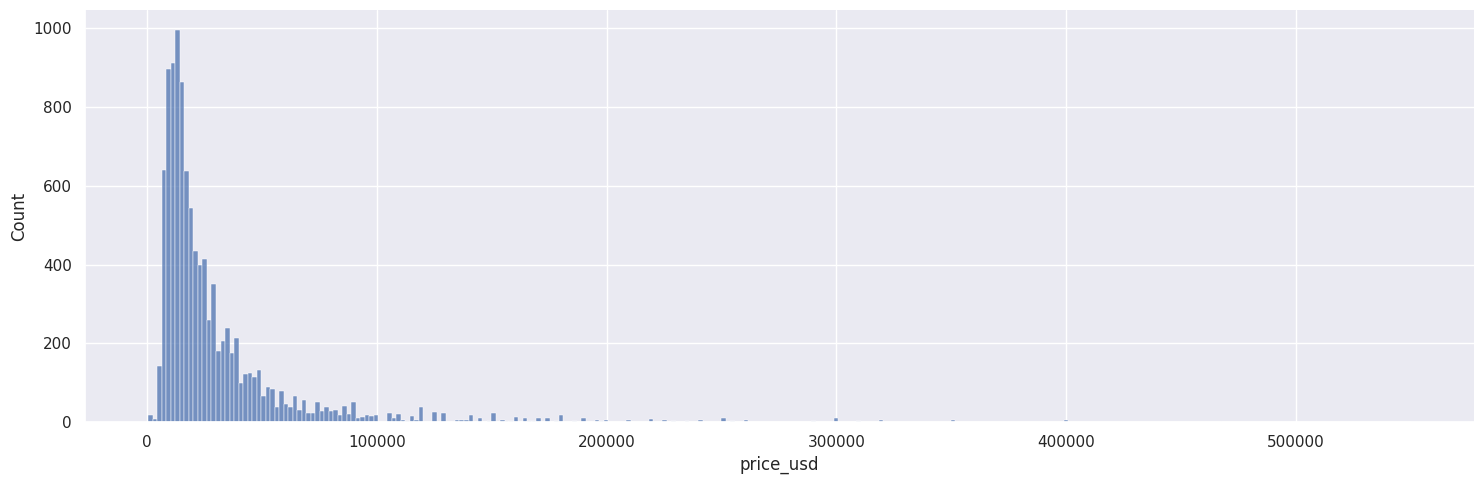

In [ ]:
## Reviso el df_sinmax
sns.displot(df_sinmax["price_usd"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
## Calculo el promedio por tipo de casa
df_sinmax.groupby("property_type")["price_usd"].mean()

,price_usd
property_type,
Sin Dato,"30,028.03"
apartment,"29,119.46"
house,"45,201.30"


In [ ]:
## Calculo cuántos datos dejaría afuera si uso DS
(df[df['price_usd']>141812.3661077845]).shape

## No parecieran ser tantos datos. Representa el 2,11%

(224, 18)

#### Decision

En función de que no tengo conocimento específico del conjunto de datos (no parecen ser valores tradicionales de inmuebles)y por lo tanto es más dificil tomar un valor arbitrario, voy a optar por la opción de DS.

In [ ]:
# Filtramos los valores dentro del rango
df_limpio = df[(df["price_usd"] >= LI_DS) & (df["price_usd"] <= LS_DS)]
df_limpio.shape


(10343, 18)

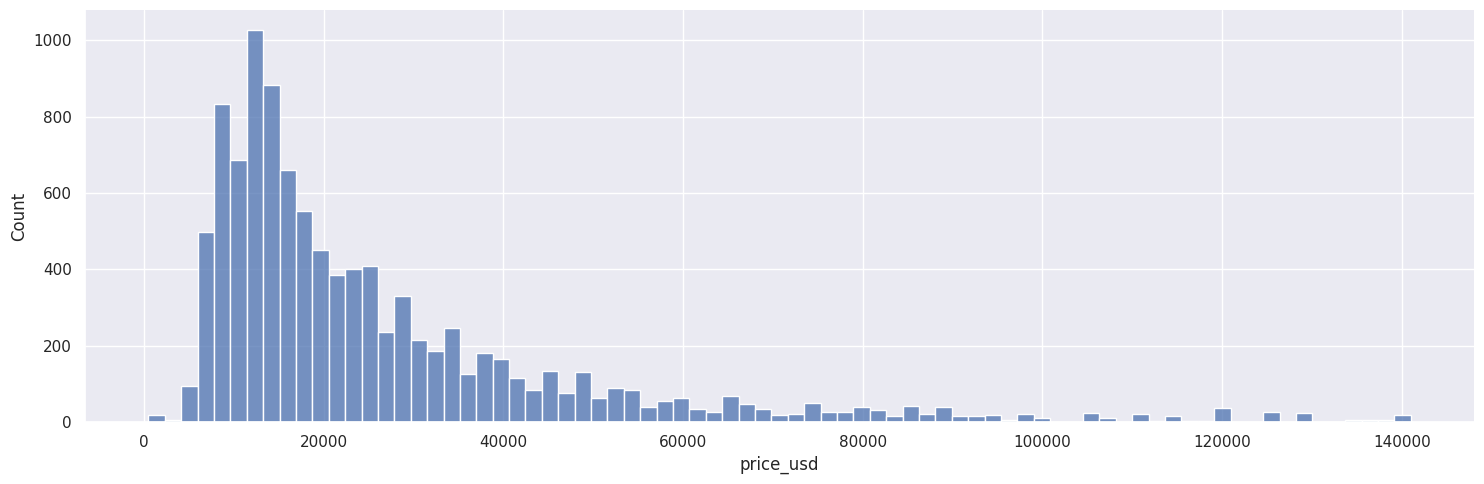

In [ ]:
## Reviso el df_limpio
sns.displot(df_limpio["price_usd"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

### Limpieza de Outliers Variables

#### Variables Numéricas

##### Sup Total

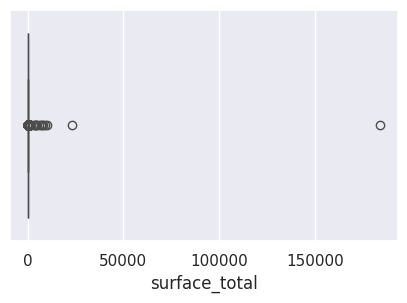

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df_limpio["surface_total"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
df_limpio = df_limpio[df_limpio['surface_total'] < 184000]

In [ ]:
## Superficie Total por DS

media = df_limpio["surface_total"].mean()
desv_std = df_limpio["surface_total"].std()

LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std

Q_a_limpiar = (df_limpio[df_limpio['surface_total']>LS_DS]).shape

print(LI_DS, LS_DS, Q_a_limpiar )


-847.1418173918851 1065.9385685038555 (13, 18)


In [ ]:
## Superficie Total por Q

Q1 = df_limpio["surface_total"].quantile(0.25)
Q3 = df_limpio["surface_total"].quantile(0.75)

IQR = Q3 - Q1

LI = Q1 - 1.5 * IQR
LS = Q3 + 1.5 * IQR

Q_a_limpiar = (df_limpio[df_limpio['surface_total']>LS]).shape

print(LI, LS, Q_a_limpiar )

-62.5 229.5 (817, 18)


In [ ]:
# Filtramos los valores dentro del rango para la superficie total
df_limpio = df_limpio[(df_limpio["surface_total"] >= LI_DS) & (df_limpio["surface_total"] <= LS_DS)]
df_limpio.shape


(10329, 18)

In [ ]:
# Agrego un filtro arbitrario para valores bajos ya que no surgió por los métodos tradicionales
df_limpio = df_limpio[(df_limpio["surface_total"] >= 10)]
df_limpio.shape


(10321, 18)

##### Sup Cubierta

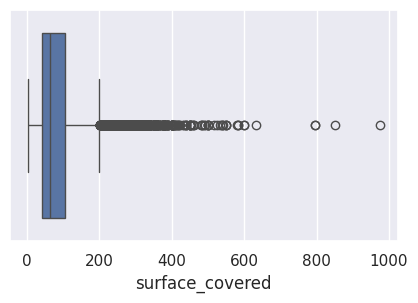

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df_limpio["surface_covered"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

##### Lat y Lon

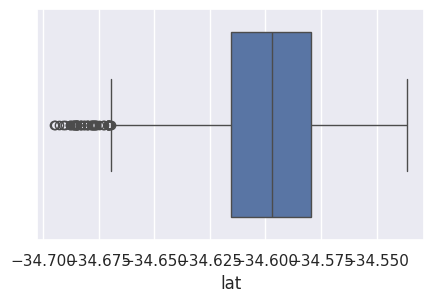

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df_limpio["lat"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

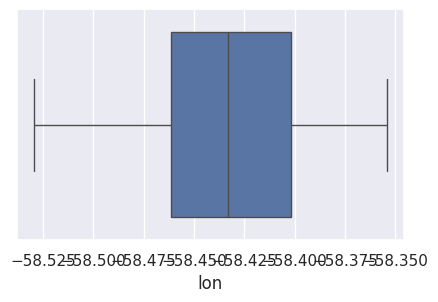

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df_limpio["lon"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

##### Rooms

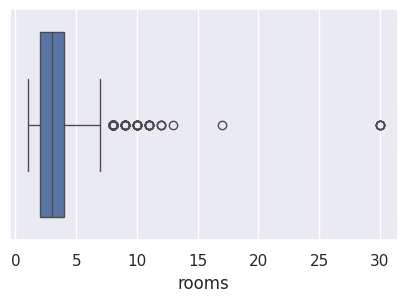

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df_limpio["rooms"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
## Superficie Total por DS

media = df_limpio["rooms"].mean()
desv_std = df_limpio["rooms"].std()

LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std

Q_a_limpiar = (df_limpio[df_limpio['rooms']>LS_DS]).shape

print(LI_DS, LS_DS, Q_a_limpiar )

-1.9292860688634415 7.866695234641951 (116, 18)


In [ ]:
## Superficie Total por Q

Q1 = df_limpio["rooms"].quantile(0.25)
Q3 = df_limpio["rooms"].quantile(0.75)

IQR = Q3 - Q1

LI = Q1 - 1.5 * IQR
LS = Q3 + 1.5 * IQR

Q_a_limpiar = (df_limpio[df_limpio['rooms']>LS]).shape

print(LI, LS, Q_a_limpiar )

-1.0 7.0 (116, 18)


In [ ]:
## Para ver categorías y cantidades
df.rooms.value_counts().sort_values(ascending=False)


,count
rooms,
3,2731
2,2516
4,2045
1,1799
5,806
6,367
7,162
8,72
9,26


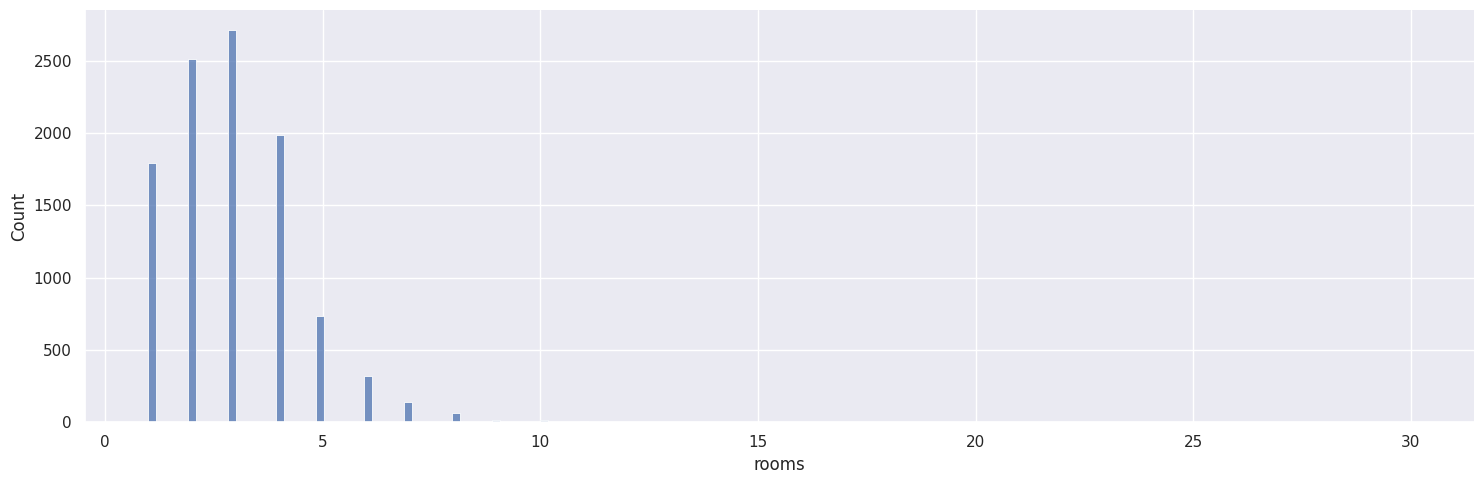

In [ ]:
## Reviso el df_limpio
sns.displot(df_limpio["rooms"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
## En este caso tomo un modo arbitrario
# Filtramos los valores dentro del rango para la superficie total
df_limpio = df_limpio[(df_limpio["rooms"] < 17) ]

print('Registros en df limpio:', df_limpio.shape[0])
print('Registros en df original:', df.shape[0])
print('% Registros conservados;', df_limpio.shape[0]/df.shape[0])

Registros en df limpio: 10315
Registros en df original: 10567
% Registros conservados; 0.9761521718557774


#### Variables Categóricas

In [ ]:
##Para ver los valores que asume una dimensión
df_limpio["property_type"].unique()

array(['apartment', 'house', 'Sin Dato'], dtype=object)

In [ ]:
## Trato los casos del tipo "Sin Dato"
#df_limpio.loc[df["title"].str.contains("apart", case=False, na=False), "property_type"] = "apartment"
#df_limpio.loc[df["title"].str.contains("casa", case=False, na=False), "property_type"] = "casa"

#No es tan clara esta clasificación

In [ ]:
## Borro los registros "Sin Dato" para tipo de propiedad
df_limpio = df_limpio[df_limpio["property_type"] !='Sin Dato']

print('Registros en df limpio:', df_limpio.shape[0])
print('Registros en df original:', df.shape[0])
print('% Registros conservados;', df_limpio.shape[0]/df.shape[0])

Registros en df limpio: 9841
Registros en df original: 10567
% Registros conservados; 0.9312955427273587


In [ ]:
##Para ver los valores que asume una dimensión
df["rooms"].unique()

array([ 2,  4,  3,  1, 12,  5,  9,  6,  7,  8, 10, 11, 17, 30, 13])

In [ ]:
##Para ver los valores que asume una dimensión
df["barrio"].unique()

array(['BALVANERA', 'PALERMO', 'ALMAGRO', 'BELGRANO', 'MONSERRAT',
       'PUERTO MADERO', 'CABALLITO', 'RECOLETA', 'SAN NICOLAS',
       'MATADEROS', 'FLORES', 'VILLA URQUIZA', 'PARQUE AVELLANEDA',
       'VERSALLES', 'NUÑEZ', 'VILLA SANTA RITA', 'MONTE CASTRO',
       'VILLA CRESPO', 'RETIRO', 'VILLA LURO', 'COLEGIALES', 'CHACARITA',
       'LINIERS', 'VILLA DEVOTO', 'FLORESTA', 'COGHLAN', 'AGRONOMIA',
       'NUEVA POMPEYA', 'PARQUE CHAS', 'CONSTITUCION', 'SAN CRISTOBAL',
       'BOCA', 'PARQUE PATRICIOS', 'VILLA PUEYRREDON', 'BOEDO',
       'VILLA GRAL. MITRE', 'PATERNAL', 'VILLA SOLDATI', 'BARRACAS',
       'SAN TELMO', 'VILLA DEL PARQUE', 'VILLA REAL', 'SAAVEDRA',
       'VELEZ SARSFIELD', 'VILLA ORTUZAR', 'PARQUE CHACABUCO',
       'VILLA LUGANO', 'VILLA RIACHUELO'], dtype=object)

In [ ]:
##Para ver los valores que asume una dimensión
df["comuna"].unique()

array([ 3, 14,  5, 13,  1,  6,  2,  9,  7, 12, 10, 11, 15,  4,  8])

In [ ]:
#Entender que tienen de diferente barrio y columna
df_limpio.groupby(['barrio', 'comuna']).size().sort_index(level=['comuna', 'barrio'])


,,0
barrio,comuna,
CONSTITUCION,1,124
MONSERRAT,1,190
PUERTO MADERO,1,145
RETIRO,1,366
SAN NICOLAS,1,266
SAN TELMO,1,88
RECOLETA,2,1077
BALVANERA,3,539
SAN CRISTOBAL,3,96


### Variables a considerar

In [ ]:
## Saco: description, title, floor (x cantidad de nulos), columnas calculadas, expensas porque la mayoría tiene valor $0
df_limpio=df_limpio[["ID", "property_type",'lat', 'lon','price_usd', 'surface_total', 'surface_covered','rooms',
       'barrio', 'comuna']]

In [ ]:
# Defino las variables numéricas
numerical = ['price_usd', 'lat', 'lon', 'surface_total','surface_covered', 'rooms']

In [ ]:
# Defino las variables categóricas
categorical = ['property_type','barrio', 'comuna']

#### Correlación

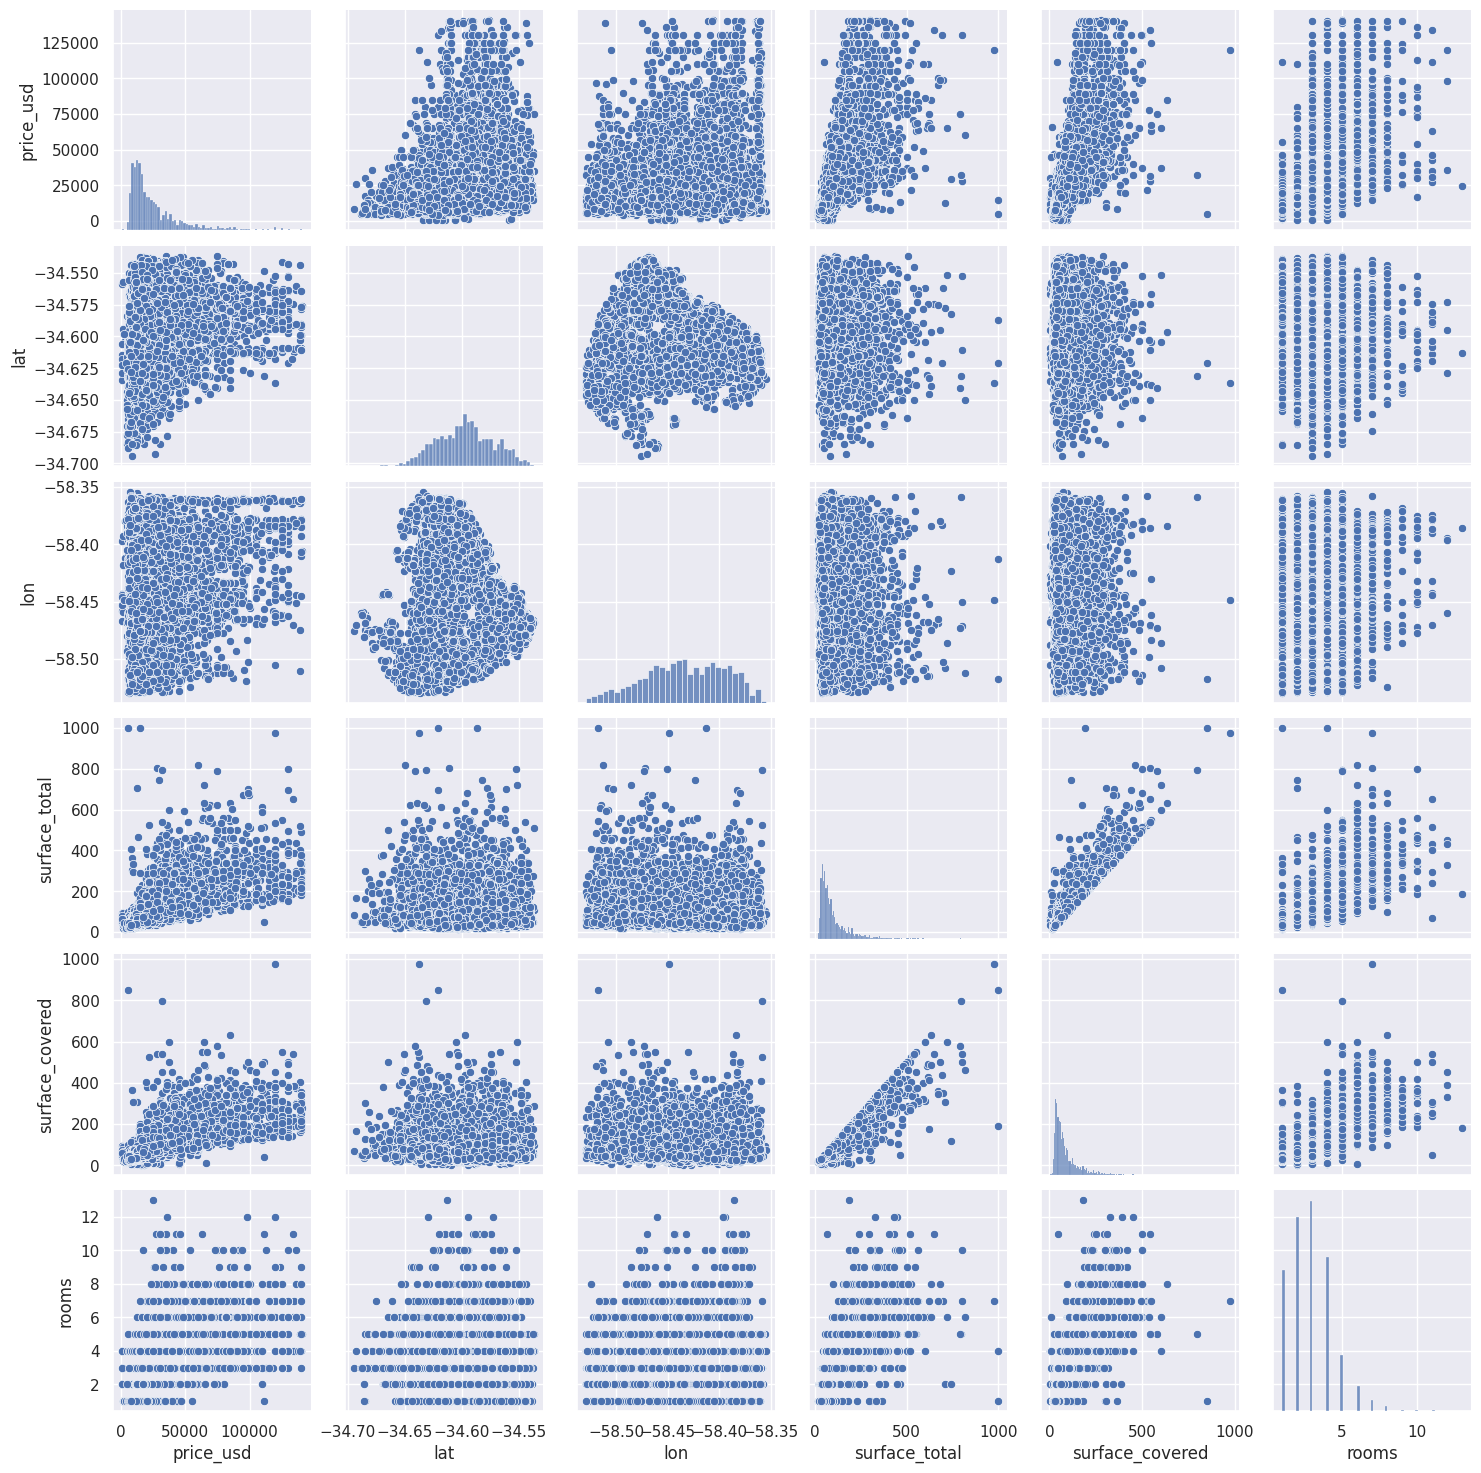

In [ ]:
## Analizo la correlación para variables numéricas

sns.pairplot(df_limpio[['price_usd', 'lat', 'lon', 'surface_total','surface_covered', 'rooms']])

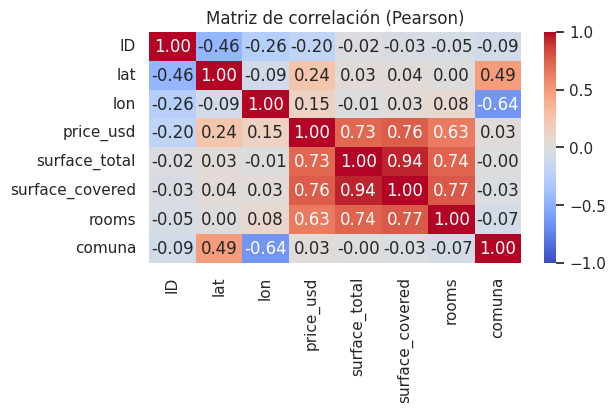

In [ ]:
## Matriz de correlación

# Selecciono solo columnas numéricas y elijo método
corr = df_limpio.select_dtypes("number").corr(method="pearson")

# grafico
plt.figure(figsize=(6, 3))
sns.heatmap(
    corr,
    annot=True,          # escribe el número dentro de cada celda
    fmt=".2f",           # 2 decimales
    cmap="coolwarm",     # azul-negativo / rojo-positivo
    vmin=-1, vmax=1      # escala completa
)
plt.title("Matriz de correlación (Pearson)")
plt.show()

## Modelo Regresión Lineal

#### Modelo 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Defino Variables y objetivo

X= df_limpio[['surface_total','surface_covered', 'rooms']]
y= df_limpio["price_usd"]

In [ ]:
# Divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)
# RL Modelo1_r2: 0.5941135095688692 -- Superficie y Rooms

0.5941135095688692

#### Modelo 2

In [ ]:
# Defino Variables y objetivo

X= df_limpio[['surface_total','surface_covered', 'rooms', 'lat', 'lon']]
y= df_limpio["price_usd"]

In [ ]:
# Divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Hago la predicción
y_pred = model.predict(X_test)

#Mido el modelo
r2_score(y_test, y_pred)

# RL Modelo1_r2: 0.5941135095688692 -- Superficie y Rooms
# RL Modelo2_r2: 0.6620055247128791 -- Superficie, Rooms, Latitud y Longitud

0.6620055247128791

### Modelo 3

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehot_encoder = OneHotEncoder()

In [ ]:
# Defino las variables categóricas
categorical = ['property_type','barrio','comuna']

In [ ]:
# OneHotEncoder dentro de ColumnTransformer
transformador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='passthrough'  # deja las otras columnas como están
)

In [ ]:
X = df_limpio.drop(columns=['price_usd'])
y = df_limpio['price_usd']

In [ ]:
X_encoded = transformador.fit_transform(X)
X=X_encoded

In [ ]:
# # Defino Variables y objetivo

# Divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Hago la predicción
y_pred = model.predict(X_test)

#Mido el modelo
r2_score(y_test, y_pred)

# RL Modelo1_r2: 0.5941135095688692 -- Superficie y Rooms
# RL Modelo2_r2: 0.6620055247128791 -- Superficie, Rooms, Latitud y Longitud
# RL Modelo3_r2: 0.7401369426734675-- Variables Numéricas y Categóricas

0.7401369426734675

## Modelo Decision Tree

In [ ]:
#Importo la función que necesito
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_dt =  DecisionTreeRegressor(random_state=42)

In [ ]:
# Defino las variables categóricas
categorical = ['property_type','barrio','comuna']

# OneHotEncoder dentro de ColumnTransformer
transformador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='passthrough'  # deja las otras columnas como están
)

# Defino X , y
X = df_limpio.drop(columns=['price_usd'])
X_encoded = transformador.fit_transform(X)

X = X_encoded
y = df_limpio['price_usd']

# Divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eligo y entreno el modelo
model_dt.fit(X_train, y_train)

#Hago la predicción
y_pred = model_dt.predict(X_test)

#Mido el modelo
r2_score(y_test, y_pred)

# RL Modelo1_r2: 0.5941135095688692 -- Superficie y Rooms
# RL Modelo2_r2: 0.6620055247128791 -- Superficie, Rooms, Latitud y Longitud
# RL Modelo3_r2: 0.7401369426734675-- Variables Numéricas y Categóricas

# DT Modelo1_r2: 0.7362301266045398-- Variables Numéricas y Categóricas

0.7362301266045398

## Incluyo Otro Dataset

### Modelo 4

Agrego un dataset de Delitos del siguiente sitio: https://data.buenosaires.gob.ar/

Especificamente: https://data.buenosaires.gob.ar/dataset/delitos/resource/b759a00c-ce18-46d2-914b-eab3fc774bdc

Incluye: Fecha, hora y ubicación de los homicidios, hurtos (sin violencia), lesiones y robos (con violencia) que ocurrieron en el ámbito de la Ciudad de Buenos Aires durante el año 2023.



In [ ]:
file_id = "1IL0fnZggAguYUcpwZluZuZ1HMWFB2plO"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
df_del = pd.read_excel(url, skiprows=0) ## Sé que el archivo tiene un encabezado y filas que no tienen datos.

In [ ]:
df_del.shape

(155897, 15)

In [ ]:
df_del.head(2)

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1114512,2023,ENERO,DOMINGO,2023-01-01,1,Amenazas,Amenazas,NO,NO,NaN,NaN,0.00,0.00,1
1,1114513,2023,ENERO,LUNES,2023-01-02,12,Amenazas,Amenazas,NO,NO,NaN,NaN,0.00,0.00,1


In [ ]:
df_del.columns

Index(['id-mapa', 'anio', 'mes', 'dia', 'fecha', 'franja', 'tipo', 'subtipo',
       'uso_arma', 'uso_moto', 'barrio', 'comuna', 'latitud', 'longitud',
       'cantidad'],
      dtype='object')

In [ ]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155897 entries, 0 to 155896
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id-mapa   155897 non-null  int64         
 1   anio      155897 non-null  int64         
 2   mes       155897 non-null  object        
 3   dia       155897 non-null  object        
 4   fecha     155897 non-null  datetime64[ns]
 5   franja    155897 non-null  int64         
 6   tipo      155897 non-null  object        
 7   subtipo   155897 non-null  object        
 8   uso_arma  155897 non-null  object        
 9   uso_moto  155897 non-null  object        
 10  barrio    152739 non-null  object        
 11  comuna    152739 non-null  float64       
 12  latitud   155549 non-null  float64       
 13  longitud  155549 non-null  float64       
 14  cantidad  155897 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 17.8+ MB


In [ ]:
df_del.barrio.value_counts()

,count
barrio,
PALERMO,13047
BALVANERA,9958
FLORES,8085
RECOLETA,6961
CABALLITO,6514
VILLA LUGANO,6247
ALMAGRO,5953
SAN NICOLAS,5564
BARRACAS,5375


In [ ]:
## Reemplazo los nombres de los barrios que no estan igual
df_del["barrio"] = df_del["barrio"].str.replace("NUÃ‘EZ", "NUÑEZ")

In [ ]:
df_del_cantidad = df_del.barrio.value_counts()
df_del_cantidad = df_del_cantidad.reset_index()  # ← convierte a DataFrame

In [ ]:
df_del_cantidad

,barrio,count
0,PALERMO,13047
1,BALVANERA,9958
2,FLORES,8085
3,RECOLETA,6961
4,CABALLITO,6514
5,VILLA LUGANO,6247
6,ALMAGRO,5953
7,SAN NICOLAS,5564
8,BARRACAS,5375
9,BELGRANO,4959


In [ ]:
## Agrego al dataset inicial la cantidad de delitos

df_limpio = df_limpio.merge(df_del_cantidad, how = 'left', on='barrio')

In [ ]:
df_limpio.head(3)

,ID,property_type,lat,lon,price_usd,surface_total,surface_covered,rooms,barrio,comuna,count
0,5415,apartment,-34.61,-58.41,"10,000.00",52,44,2,BALVANERA,3,9958
1,1761,apartment,-34.59,-58.41,"35,000.00",111,104,4,PALERMO,14,13047
2,1826,apartment,-34.58,-58.42,"9,350.00",32,32,2,PALERMO,14,13047


In [ ]:
df_limpio.rename(columns={"count": "cantidad_delitos"}, inplace=True)

In [ ]:
df_limpio.head(3)

,ID,property_type,lat,lon,price_usd,surface_total,surface_covered,rooms,barrio,comuna,cantidad_delitos
0,5415,apartment,-34.61,-58.41,"10,000.00",52,44,2,BALVANERA,3,9958
1,1761,apartment,-34.59,-58.41,"35,000.00",111,104,4,PALERMO,14,13047
2,1826,apartment,-34.58,-58.42,"9,350.00",32,32,2,PALERMO,14,13047


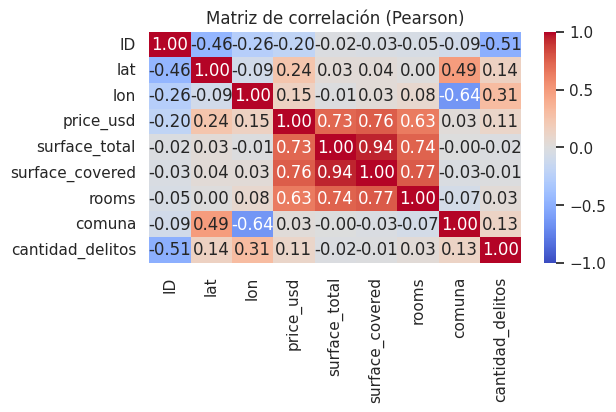

In [ ]:
## Matriz de correlación

# Selecciono solo columnas numéricas y elijo método
corr = df_limpio.select_dtypes("number").corr(method="pearson")

# grafico
plt.figure(figsize=(6, 3))
sns.heatmap(
    corr,
    annot=True,          # escribe el número dentro de cada celda
    fmt=".2f",           # 2 decimales
    cmap="coolwarm",     # azul-negativo / rojo-positivo
    vmin=-1, vmax=1      # escala completa
)
plt.title("Matriz de correlación (Pearson)")
plt.show()

In [ ]:
# Defino las variables categóricas
categorical = ['property_type','barrio','comuna']

# OneHotEncoder dentro de ColumnTransformer
transformador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='passthrough'  # deja las otras columnas como están
)

# Defino X , y
X = df_limpio.drop(columns=['price_usd'])
X_encoded = transformador.fit_transform(X)

X = X_encoded
y = df_limpio['price_usd']

# Divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Hago la predicción
y_pred = model.predict(X_test)

#Mido el modelo
r2_score(y_test, y_pred)

# RL Modelo1_r2: 0.5941135095688692 -- Superficie y Rooms
# RL Modelo2_r2: 0.6620055247128791 -- Superficie, Rooms, Latitud y Longitud
# RL Modelo3_r2: 0.7401369426734675-- Variables Numéricas y Categóricas

# DT Modelo1_r2: 0.7362301266045398-- Variables Numéricas y Categóricas

# RL Modelo4_r2: 0.7402560157061026-- Incluye Cantidad de Delitos


0.7402560157061026

In [ ]:
df_limpio

,ID,property_type,lat,lon,price_usd,surface_total,surface_covered,rooms,barrio,comuna,cantidad_delitos
0,5415,apartment,-34.61,-58.41,"10,000.00",52,44,2,BALVANERA,3,9958
1,1761,apartment,-34.59,-58.41,"35,000.00",111,104,4,PALERMO,14,13047
2,1826,apartment,-34.58,-58.42,"9,350.00",32,32,2,PALERMO,14,13047
3,3410,apartment,-34.61,-58.43,"14,000.00",55,55,3,ALMAGRO,5,5953
4,946,apartment,-34.57,-58.46,"69,000.00",185,185,4,BELGRANO,13,4959
...,...,...,...,...,...,...,...,...,...,...,...
9836,431,apartment,-34.56,-58.46,"11,290.00",39,36,1,BELGRANO,13,4959
9837,5580,apartment,-34.60,-58.41,"16,800.00",73,62,2,BALVANERA,3,9958
9838,7470,apartment,-34.60,-58.38,"7,000.00",23,23,1,SAN NICOLAS,1,5564
9839,5323,apartment,-34.62,-58.40,"7,390.00",32,32,1,BALVANERA,3,9958


### Modelo 5

Incluyo info de ciclovias

In [ ]:
file_id = "1O_eESqERVcwr6zoqo8BzRt-yFmpU-Sk4"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
df_ciclovia = pd.read_excel(url, skiprows=0) ## Sé que el archivo tiene un encabezado y filas que no tienen datos

In [ ]:
df_ciclovia.head()

,id,nombre,tipo,comuna,barrio,longitud_m,geometry
0,10650,"PERON, JUAN DOMINGO, TTE. GENERAL",Ciclovías mano única,1,San Nicolas,52.98,LINESTRING (-58.3802625790606 -34.606056085163...
1,14588,RINCON,Ciclovías,3,San Cristobal,118.72,LINESTRING (-58.395928300929576 -34.6195618346...
2,7180,NUEVA YORK,Ciclovías,15,Agronomia,129.98,LINESTRING (-58.49641933160354 -34.59071404109...
3,15268,ESTADOS UNIDOS,Ciclovías,5,Boedo,71.00,LINESTRING (-58.42270933136431 -34.62306774122...
4,17386,ESTRADA,Ciclovías,7,Parque Chacabuco,132.34,LINESTRING (-58.42598142884307 -34.63045069879...


In [ ]:
## Mayuscula para barrios
df_ciclovia["barrio"] = df["barrio"].str.upper()

In [ ]:
## Pruebo haciendo el join por comuna
df_ciclovia_cantidad_barrio = df_ciclovia.barrio.value_counts()
df_ciclovia_cantidad_barrio = df_ciclovia_cantidad_barrio.reset_index()  # ← convierte a DataFrame
df_ciclovia_cantidad_barrio.rename(columns={"count": "cantidad_ciclovia_barrio"}, inplace=True)
df_ciclovia_cantidad_barrio.head(5)

,barrio,cantidad_ciclovia_barrio
0,PALERMO,438
1,RECOLETA,303
2,BELGRANO,191
3,BALVANERA,172
4,CABALLITO,141


In [ ]:
## Agrego al dataset inicial la cantidad de ciclovia por barrio

df_limpio = df_limpio.merge(df_ciclovia_cantidad_barrio, how = 'left', on='barrio')

In [ ]:
# Borrar columnas
df_limpio = df_limpio.drop(columns=['cantidad_delitos'])


In [ ]:
df_limpio.head(3)

,ID,property_type,lat,lon,price_usd,surface_total,surface_covered,rooms,barrio,comuna,cantidad_ciclovia_barrio
0,5415,apartment,-34.61,-58.41,"10,000.00",52,44,2,BALVANERA,3,172
1,1761,apartment,-34.59,-58.41,"35,000.00",111,104,4,PALERMO,14,438
2,1826,apartment,-34.58,-58.42,"9,350.00",32,32,2,PALERMO,14,438


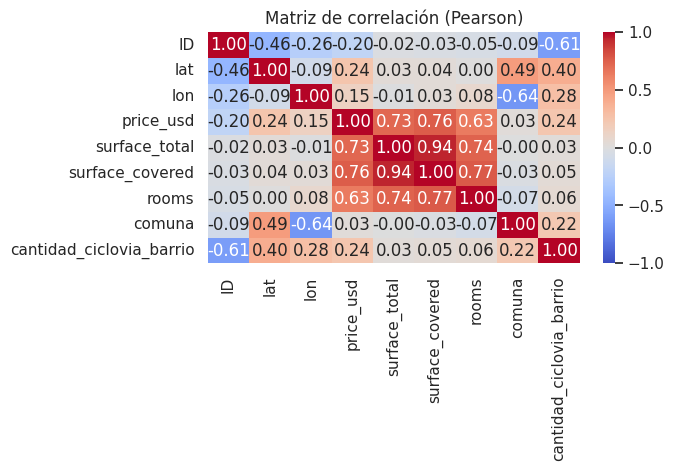

In [ ]:
## Matriz de correlación

# Selecciono solo columnas numéricas y elijo método
corr = df_limpio.select_dtypes("number").corr(method="pearson")

# grafico
plt.figure(figsize=(6, 3))
sns.heatmap(
    corr,
    annot=True,          # escribe el número dentro de cada celda
    fmt=".2f",           # 2 decimales
    cmap="coolwarm",     # azul-negativo / rojo-positivo
    vmin=-1, vmax=1      # escala completa
)
plt.title("Matriz de correlación (Pearson)")
plt.show()

In [ ]:
# Defino las variables categóricas
categorical = ['property_type','barrio','comuna']

# OneHotEncoder dentro de ColumnTransformer
transformador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='passthrough'  # deja las otras columnas como están
)

# Defino X , y
X = df_limpio.drop(columns=['price_usd'])
X_encoded = transformador.fit_transform(X)

X = X_encoded
y = df_limpio['price_usd']

# Divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Hago la predicción
y_pred = model.predict(X_test)

#Mido el modelo
r2_score(y_test, y_pred)

# RL Modelo1_r2: 0.5941135095688692 -- Superficie y Rooms
# RL Modelo2_r2: 0.6620055247128791 -- Superficie, Rooms, Latitud y Longitud
# RL Modelo3_r2: 0.7401369426734675-- Variables Numéricas y Categóricas

# DT Modelo1_r2: 0.7362301266045398-- Variables Numéricas y Categóricas

# RL Modelo4_r2: 0.7402560157061026-- Incluye Cantidad de Delitos
# RL Modelo4_r2: 0.74019426020520276-- Incluye Cantidad de Ciclovias

0.7401942602052027

### Modelo 6

Incluyo un dataset de Valor de Terrenos
Sitio: https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta

Resumen del Dataset
Terrenos: Valor de Oferta
Ministerio de Desarrollo Urbano y Transporte. SS de Planeamiento. DG Diagnóstico territorial y Proyección Urbana
Precio de oferta de venta de terrenos de la Ciudad, representado en puntos de valor del suelo correspondientes a cada parcela. Con el fin de analizar el precio de oferta, se toma como unidad de referencia el precio del metro cuadrado (m2). Se utiliza el precio en dólares. Se incluyen las dimensiones, ubicación geográfica, y la normativa del Código de Planeamiento Urbano que rige la zona.

In [ ]:
## Incorporo mas información
file_id = "1hubcmCP_Qt9JpD3_czc546rwCPwfTtIp"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
df_terreno = pd.read_excel(url, skiprows=0) ## Sé que el archivo tiene un encabezado y filas que no tienen datos

In [ ]:
df_terreno.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5


In [ ]:
## Reemplazo los nombres de los barrios que no estan igual
df_terreno["BARRIO"] = df_terreno["BARRIO"].str.replace("MONTSERRAT", "MONSERRAT")
df_terreno["BARRIO"] = df_terreno["BARRIO"].str.replace("FLORES NORTE", "FLORES")
df_terreno["BARRIO"] = df_terreno["BARRIO"].str.replace("FLORES SUR", "FLORES")
df_terreno["BARRIO"] = df_terreno["BARRIO"].str.replace("BARRACAS ESTE", "BARRACAS")
df_terreno["BARRIO"] = df_terreno["BARRIO"].str.replace("VILLA DEVOTO NORTE", "VILLA DEVOTO")
df_terreno["BARRIO"] = df_terreno["BARRIO"].str.replace("VILLA DEVOTO SUR", "VILLA DEVOTO")

In [ ]:
## Armo un dataset del promedio del valor de m2 de terreno en usd
df_terreno_promedio = df_terreno.groupby("BARRIO")[["PROPIEDADS", "PRECIOUSD"]].sum()
df_terreno_promedio  = df_terreno_promedio.reset_index()  # ← convierte a DataFrame
df_terreno_promedio["valorpromedio_terreno_usd_m2"] = df_terreno_promedio["PRECIOUSD"]/df_terreno_promedio["PROPIEDADS"]
df_terreno_promedio.rename(columns={"BARRIO": "barrio" }, inplace=True)
df_terreno_promedio.head(5)


,barrio,PROPIEDADS,PRECIOUSD,valorpromedio_terreno_usd_m2
0,AGRONOMIA,35016,62119900,"1,774.04"
1,ALMAGRO,185121,408280450,"2,205.48"
2,BALVANERA,293458,529698567,"1,805.02"
3,BARRACAS,130972,196290000,"1,498.72"
4,BARRACAS OESTE,10293,6444000,626.06


In [ ]:
## Armo un dataset del promedio del valor de m2 de terreno en usd
#df_terreno_promedio = df_terreno.groupby(['BARRIO'])['DOLARM2'].mean()
#df_terreno_promedio  = df_terreno_promedio.reset_index()  # ← convierte a DataFrame
#df_terreno_promedio.rename(columns={"DOLARM2": "valorpromedio_terreno_usd_m2","BARRIO": "barrio" }, inplace=True)
#df_terreno_promedio.head(5)

In [ ]:
## Agrego al dataset inicial la cantidad de ciclovia por barrio
df_limpio = df_limpio.merge(df_terreno_promedio, how = 'left', on='barrio')
df_limpio.head()

,ID,property_type,lat,lon,price_usd,surface_total,surface_covered,rooms,barrio,comuna,cantidad_ciclovia_barrio,PROPIEDADS,PRECIOUSD,valorpromedio_terreno_usd_m2
0,5415,apartment,-34.61,-58.41,"10,000.00",52,44,2,BALVANERA,3,172,293458,529698567,"1,805.02"
1,1761,apartment,-34.59,-58.41,"35,000.00",111,104,4,PALERMO,14,438,211967,764969701,"3,608.91"
2,1826,apartment,-34.58,-58.42,"9,350.00",32,32,2,PALERMO,14,438,211967,764969701,"3,608.91"
3,3410,apartment,-34.61,-58.43,"14,000.00",55,55,3,ALMAGRO,5,122,185121,408280450,"2,205.48"
4,946,apartment,-34.57,-58.46,"69,000.00",185,185,4,BELGRANO,13,191,126207,436084998,"3,455.32"


In [ ]:
# Borrar la columna
df_limpio = df_limpio.drop(columns=['cantidad_ciclovia_barrio', 'PROPIEDADS', 'PRECIOUSD' ])

In [ ]:
df_limpio.head(3)

,ID,property_type,lat,lon,price_usd,surface_total,surface_covered,rooms,barrio,comuna,valorpromedio_terreno_usd_m2
0,5415,apartment,-34.61,-58.41,"10,000.00",52,44,2,BALVANERA,3,"1,805.02"
1,1761,apartment,-34.59,-58.41,"35,000.00",111,104,4,PALERMO,14,"3,608.91"
2,1826,apartment,-34.58,-58.42,"9,350.00",32,32,2,PALERMO,14,"3,608.91"


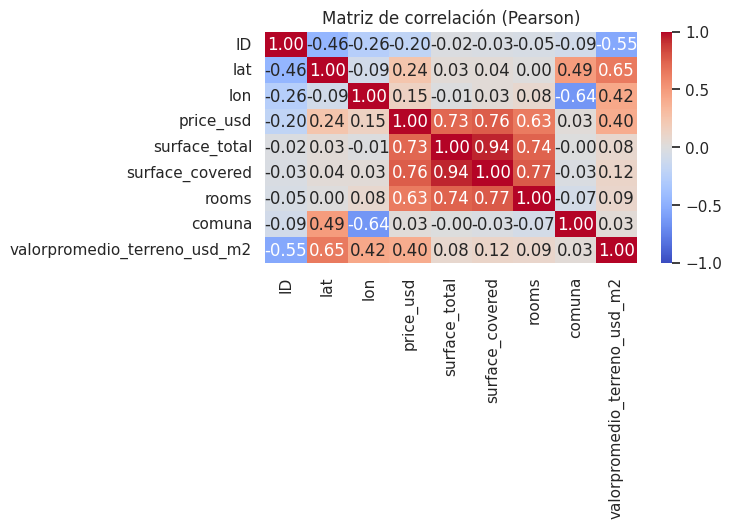

In [ ]:
## Matriz de correlación

# Selecciono solo columnas numéricas y elijo método
corr = df_limpio.select_dtypes("number").corr(method="pearson")

# grafico
plt.figure(figsize=(6, 3))
sns.heatmap(
    corr,
    annot=True,          # escribe el número dentro de cada celda
    fmt=".2f",           # 2 decimales
    cmap="coolwarm",     # azul-negativo / rojo-positivo
    vmin=-1, vmax=1      # escala completa
)
plt.title("Matriz de correlación (Pearson)")
plt.show()

In [ ]:
# Defino las variables categóricas
categorical = ['property_type','barrio','comuna']

# OneHotEncoder dentro de ColumnTransformer
transformador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='passthrough'  # deja las otras columnas como están
)

# Defino X , y
X = df_limpio.drop(columns=['price_usd'])
X_encoded = transformador.fit_transform(X)

X = X_encoded
y = df_limpio['price_usd']

# Divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Hago la predicción
y_pred = model.predict(X_test)

#Mido el modelo
r2_score(y_test, y_pred)

# RL Modelo1_r2: 0.5941135095688692 -- Superficie y Rooms
# RL Modelo2_r2: 0.6620055247128791 -- Superficie, Rooms, Latitud y Longitud
# RL Modelo3_r2: 0.7401369426734675-- Variables Numéricas y Categóricas

# DT Modelo1_r2: 0.7362301266045398-- Variables Numéricas y Categóricas

# RL Modelo4_r2: 0.7402560157061026-- Incluye Cantidad de Delitos
# RL Modelo5_r2: 0.74019426020520276-- Incluye Cantidad de Ciclovias
# RL Modelo6_r2: 0.739785447088965-- Incluye Precio de Terrenos

0.739785447088965

## Selección de Modelo Final

En este análisis se probaron diferentes modelos: de regresión lineal y árbol de decisión.

La métrica utilizada para evaluar el desempeño de los modelos fue el coeficiente de determinación R², que mide qué tan bien las variables explican la variabilidad del precio.

Se selecciona el Modelo 4 de Regresión Lineal, que incluye variables numéricas, categóricas y la cantidad de delitos por barrio.

In [ ]:
## Elimino la columna del valor de los terrenos
df_limpio = df_limpio.drop(columns=['valorpromedio_terreno_usd_m2'])


In [ ]:
## Agrego de nuevo Cantidad de Delitos
df_limpio = df_limpio.merge(df_del_cantidad, how = 'left', on='barrio')

In [ ]:
# Defino las variables categóricas
categorical = ['property_type','barrio','comuna']

# OneHotEncoder dentro de ColumnTransformer
transformador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='passthrough'  # deja las otras columnas como están
)

# Defino X , y
X = df_limpio.drop(columns=['price_usd'])
X_encoded = transformador.fit_transform(X)

X = X_encoded
y = df_limpio['price_usd']

# Divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Hago la predicción
y_pred = model.predict(X_test)

#Mido el modelo
r2_score(y_test, y_pred)

0.7402560157061026

In [ ]:
print('Real      : ', y_test[:5].values)
print('Prediccion: ', y_pred[:5])

Real      :  [ 9300.  12000.  11000.  14800.  28574.2]
Prediccion:  [11843.33374262 15267.32790757 18489.55942401 23846.61525026
 34201.79833901]


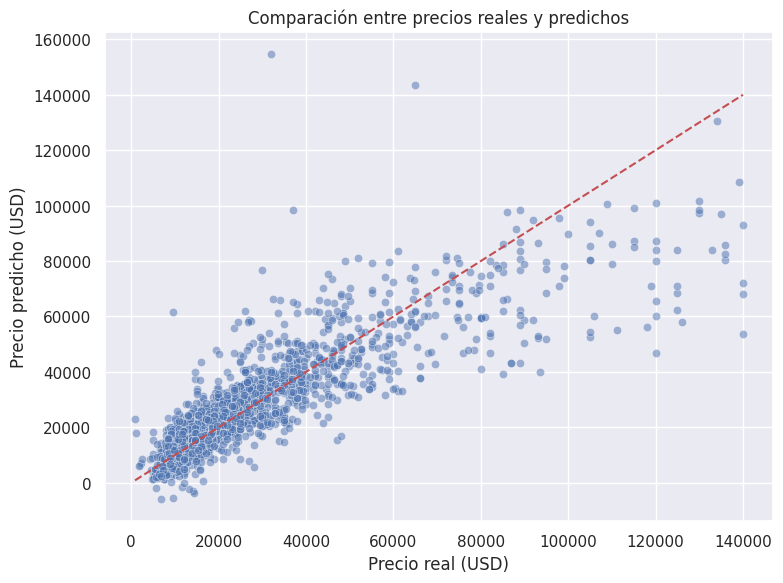

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Línea ideal: donde y = x (predicción perfecta)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Precio real (USD)")
plt.ylabel("Precio predicho (USD)")
plt.title("Comparación entre precios reales y predichos")
plt.grid(True)
plt.tight_layout()
plt.show()

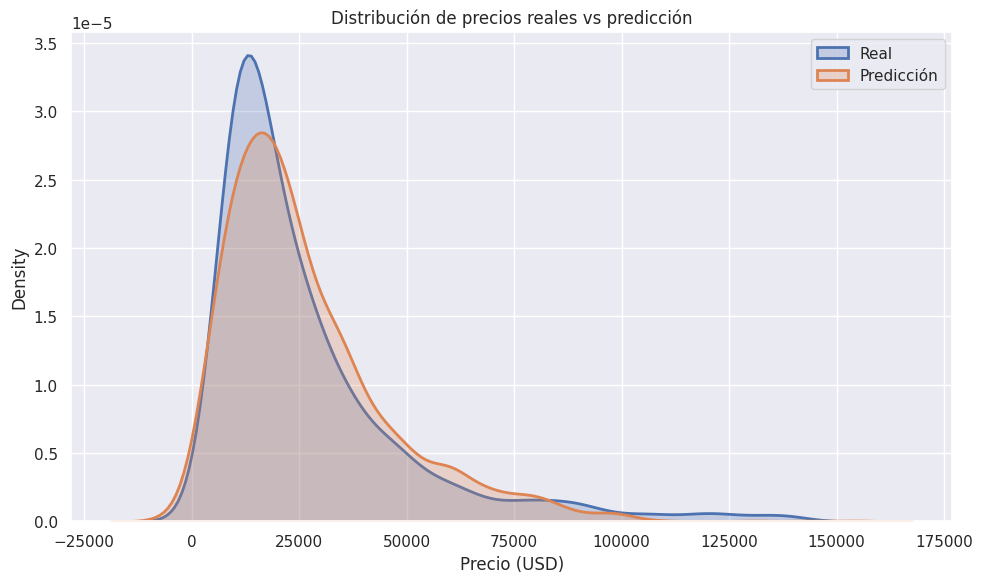

In [ ]:
plt.figure(figsize=(10,6))

sns.kdeplot(y_test, label='Real', fill=True, linewidth=2)
sns.kdeplot(y_pred, label='Predicción', fill=True, linewidth=2)

plt.title('Distribución de precios reales vs predicción')
plt.xlabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()